# Linear Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Load the data
df = pd.read_csv("FinalDataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 2466 non-null   int64  
 1   SSD_Capacity          2466 non-null   float64
 2   RAM                   2466 non-null   float64
 3   Graphics_Card         2466 non-null   int64  
 4   Operating_System      2466 non-null   int64  
 5   Graphics_Memory_Type  2466 non-null   int64  
 6   Graphics_Card_Type    2466 non-null   int64  
 7   Processor_Core_Count  2466 non-null   float64
 8   Graphics_Card_Memory  2466 non-null   float64
 9   Price                 2466 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 192.8 KB


In [4]:

X = df.drop('Price', axis=1)  # Features (all columns except Price)
y = df['Price']               # Target variable

# Recreate train/val/test split and standardize only original numerical columns
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
# Print shapes after splitting.

print(f"X_train_scaled shape: {X_train.shape}")
print(f"X_val_scaled shape: {X_val.shape}")
print(f"X_test_scaled shape: {X_test.shape}")

X_train_scaled shape: (1479, 9)
X_val_scaled shape: (493, 9)
X_test_scaled shape: (494, 9)


In [5]:
# Standardize only the original numerical columns
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Print shapes after standardization before removing Outliers
print("\nAfter standardization(with Outliers):")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_val_scaled shape: {X_val_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")


After standardization(with Outliers):
X_train_scaled shape: (1479, 9)
X_val_scaled shape: (493, 9)
X_test_scaled shape: (494, 9)


In [6]:

# Filter data using the mask
X_train_clean = X_train_scaled
y_train_clean = y_train

print(X_train_clean.shape, y_train_clean.shape)

(1479, 9) (1479,)


In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_clean, y_train_clean)

y_pred = model.predict(X_test_scaled)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Adjusted R^2
r2 = r2_score(y_test, y_pred)
n = X_test_scaled.shape[0]
p = X_test_scaled.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"R2 Score:{r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Adjusted R² Score: {adjusted_r2:.4f}")

R2 Score:0.5107
Root Mean Squared Error (RMSE): 14623.3538
Adjusted R² Score: 0.5016


# Using Ridge Regression

In [8]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

# Step 4: Train a Linear Regression model with RidgeCV (includes hyperparameter tuning for regularization)
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]
model = RidgeCV(alphas=alphas, cv=5)
model.fit(X_train_clean, y_train_clean)

# Predict on test set
y_pred = model.predict(X_test_scaled)


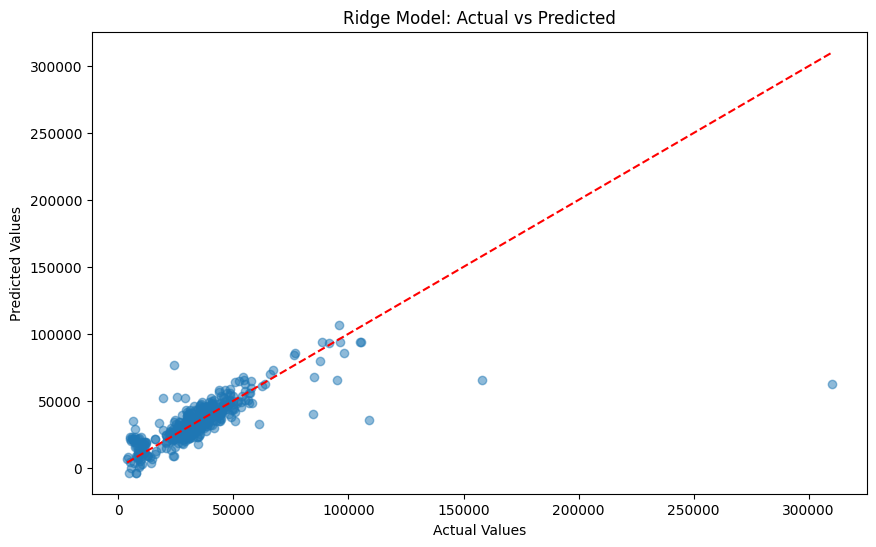

In [9]:
# Visualization of model performance
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Model: Actual vs Predicted')
plt.show()

In [10]:
# Step 5: Evaluation
# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Adjusted R^2
r2 = r2_score(y_test, y_pred)
n = X_test_scaled.shape[0]
p = X_test_scaled.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [11]:
# Display results with clear labels
print(f"Best alpha (regularization strength): {model.alpha_:.4f}")
print(f"R2 Score:{r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Adjusted R² Score: {adjusted_r2:.4f}")

# You can also create a more visually appealing display using a DataFrame
import pandas as pd
results = pd.DataFrame({
    'Metric': ['Best Alpha', 'RMSE', 'Adjusted R²'],
    'Value': [model.alpha_, rmse, adjusted_r2]
})
results.set_index('Metric', inplace=True)
results

Best alpha (regularization strength): 100.0000
R2 Score:0.5168
Root Mean Squared Error (RMSE): 14530.8739
Adjusted R² Score: 0.5078


,Value
Metric,
Best Alpha,100.000000
RMSE,14530.873856
Adjusted R²,0.507837


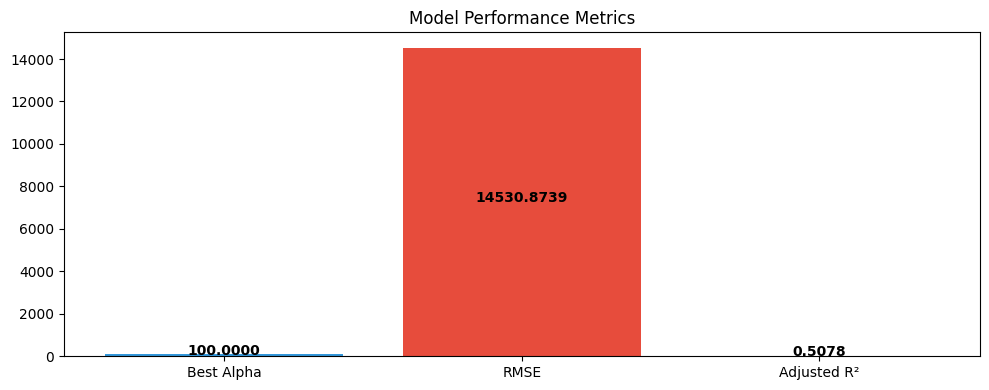

In [12]:
# Visual display of key metrics
fig, ax = plt.subplots(figsize=(10, 4))
metrics = ['Best Alpha', 'RMSE', 'Adjusted R²']
values = [model.alpha_, rmse, adjusted_r2]
colors = ['#3498db', '#e74c3c', '#2ecc71']

ax.bar(metrics, values, color=colors)
ax.set_title('Model Performance Metrics')
for i, v in enumerate(values):
    ax.text(i, v/2, f'{v:.4f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()